**Importing libraries**

In [1]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math

**Reading Training Data**

In [2]:

file_path = "cluster_map"

with open(file_path, "r") as file:
    file_data = file.readlines()

region_table = []
for row in file_data:
    row_values = row.strip().split("\t")
    row_dict = {"region_hash": row_values[0], "region_id": row_values[1]}
    region_table.append(row_dict)
    
r_df = pd.DataFrame(region_table)
#print(r_df)


file_path = "poi_data"

with open(file_path, "r") as file:
    file_data = file.readlines()

poi_table = []
for row in file_data:
    row_values = row.strip().split("\t")
    region_hash = row_values[0]
    poi_class = row_values[1:]
    row_dict = {"region_hash": region_hash, "poi_class": poi_class}
    poi_table.append(row_dict)

poi_df = pd.DataFrame(poi_table)
#print(poi_df)




directory_path = "weather"

weather_table = []

for file_name in os.listdir(directory_path):

    file_path = os.path.join(directory_path, file_name)

    with open(file_path, "r") as file:
        file_data = file.readlines()
        for row in file_data:
            row_values = row.strip().split("\t")

            time = row_values[0]
            weather = row_values[1]
            temperature = row_values[2]
            pm25 = row_values[3]

            row_dict = {"time": time, "weather": weather, "temperature": temperature, "PM2.5": pm25}
            weather_table.append(row_dict)
w_df = pd.DataFrame(weather_table)
#print(w_df)


column_names = ['order_id', 'driver_id', 'passenger_id', 'start_region_hash', 'dest_region_hash', 'Price', 'time']

directory_path = "order"
o_df = pd.concat((pd.read_csv(os.path.join(directory_path, f), sep='\t', names=column_names) for f in os.listdir(directory_path)))

#print(o_df)


**Adding Feature like day and weekday**

In [3]:
o_df['time'] = pd.to_datetime(o_df['time'])
o_df['day'] = o_df['time'].dt.day
o_df['weekday'] = o_df['time'].dt.weekday

**Defining time slot function**

In [4]:
def add_time_slot(df):
    df['time'] = pd.to_datetime(df['time'])
    df['time'] = df['time'].dt.strftime('%Y-%m-%d') + '-' + ((df['time'].dt.hour * 60 + df['time'].dt.minute) // 10 + 1).astype(str)
    return df


**Adding time slot feature to weather and order dataframes**

In [5]:
add_time_slot(w_df)
add_time_slot(o_df)

,order_id,driver_id,passenger_id,start_region_hash,dest_region_hash,Price,time,day,weekday
0,97ebd0c6680f7c0535dbfdead6e51b4b,dd65fa250fca2833a3a8c16d2cf0457c,ed180d7daf639d936f1aeae4f7fb482f,4725c39a5e5f4c188d382da3910b3f3f,3e12208dd0be281c92a6ab57d9a6fb32,24.0,2016-01-01-82,1,4
1,92c3ac9251cc9b5aab90b114a1e363be,c077e0297639edcb1df6189e8cda2c3d,191a180f0a262aff3267775c4fac8972,82cc4851f9e4faa4e54309f8bb73fd7c,b05379ac3f9b7d99370d443cfd5dcc28,2.0,2016-01-01-59,1,4
2,abeefc3e2aec952468e2fd42a1649640,86dbc1b68de435957c61b5a523854b69,7029e813bb3de8cc73a8615e2785070c,fff4e8465d1e12621bc361276b6217cf,fff4e8465d1e12621bc361276b6217cf,9.0,2016-01-01-111,1,4
3,cb31d0be64cda3cc66b46617bf49a05c,4fadfa6eeaa694742de036dddf02b0c4,21dc133ac68e4c07803d1c2f48988a83,4b7f6f4e2bf237b6cc58f57142bea5c0,4b7f6f4e2bf237b6cc58f57142bea5c0,11.0,2016-01-01-134,1,4
4,139d492189ae5a933122c098f63252b3,NaN,26963cc76da2d8450d8f23fc357db987,fc34648599753c9e74ab238e9a4a07ad,87285a66236346350541b8815c5fae94,4.0,2016-01-01-103,1,4
...,...,...,...,...,...,...,...,...,...
474335,cafb9e232939a35864828106a9eb29de,41b1420d7eca93cae483a3cc512a3c8e,8624faec3daacfb8c25ab32fc24138ac,4725c39a5e5f4c188d382da3910b3f3f,929ec6c160e6f52c20a4217c7978f681,13.0,2016-01-21-122,21,3
474336,5cb3d303c27e40a1c299db008a12c05e,613ab06307b1a4e280f3790e8b70a465,9a03b3b33c60b2fa437a76ac97a5412f,b05379ac3f9b7d99370d443cfd5dcc28,38d5ad2d22b61109fd8e7b43cd0e8901,16.0,2016-01-21-112,21,3
474337,054490fd30b954d5d270fdccc4640d65,88c1497b0403e38f15c9d2776a7e3822,3d3354e5cf6d6d7d5a62db0a78d69e77,2407d482f0ffa22a947068f2551fe62c,62afaf3288e236b389af9cfdc5206415,27.9,2016-01-21-110,21,3
474338,361f6ea3eb5436ae5e0c16c12b9ec645,82d199a4dd2cfefb2f5e4b417e27b1d8,0ae5e59b712786b3c3796da8c8716349,d05052b4bda7662a084f235e880f50fa,90c5a34f06ac86aee0fd70e2adce7d8a,11.0,2016-01-21-113,21,3


**In the next section we will merge the weather and order dataframes**

In [6]:
new_df = pd.merge(o_df, w_df, on='time')
new_df = new_df.drop_duplicates()

**Merging with region data**

In [7]:
new_merged_df = pd.merge(new_df, r_df, left_on='start_region_hash', right_on='region_hash')
new_merged_df = new_merged_df.drop_duplicates()



**Droping the unwanted columns**

In [8]:
new_merged_df = new_merged_df.drop(['region_hash'], axis=1)
new_merged_df = new_merged_df.drop(['dest_region_hash'], axis=1)
new_merged_df = new_merged_df.drop(['order_id'], axis=1)
new_merged_df = new_merged_df.drop(['passenger_id'], axis=1)
new_merged_df = new_merged_df.drop(['Price'], axis=1)
print(new_merged_df)

                                driver_id                 start_region_hash  \
0        dd65fa250fca2833a3a8c16d2cf0457c  4725c39a5e5f4c188d382da3910b3f3f   
1        dd65fa250fca2833a3a8c16d2cf0457c  4725c39a5e5f4c188d382da3910b3f3f   
2        476de29d4a7b8bcedea92bbf67a5d834  4725c39a5e5f4c188d382da3910b3f3f   
3        476de29d4a7b8bcedea92bbf67a5d834  4725c39a5e5f4c188d382da3910b3f3f   
4                                     NaN  4725c39a5e5f4c188d382da3910b3f3f   
...                                   ...                               ...   
7596848                               NaN  0a5fef95db34383403d11cb6af937309   
7596849                               NaN  0a5fef95db34383403d11cb6af937309   
7596850                               NaN  0a5fef95db34383403d11cb6af937309   
7596851                               NaN  0a5fef95db34383403d11cb6af937309   
7596852  711d22068f633c117bf9f1c9d2cb5ac5  0a5fef95db34383403d11cb6af937309   

                   time  day  weekday weather tempe

**Calculating the gap using driver id**

In [9]:

def gap_finder(frames):
    cal = 0
    for i in frames.index:
        if pd.isna(frames.loc[i, 'driver_id']):
            cal += 1
    
    frames['gap'] = len(frames) - cal
    return frames

new_merged_df = new_merged_df.groupby(['start_region_hash', 'time']).apply(gap_finder).reset_index()


C:\Users\Dell\AppData\Local\Temp\ipykernel_4276\3050666636.py:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  new_merged_df = new_merged_df.groupby(['start_region_hash', 'time']).apply(gap_finder).reset_index()


**Sorting on the basis of time**

In [10]:

new_merged_df = new_merged_df.sort_values(by=['time'])
new_merged_df = new_merged_df.reset_index(drop=True)
new_merged_df = new_merged_df.drop(['index'], axis=1)


**Calculating the poi-effect**

In [11]:
def calculate_poi_effect(row):
    total = 0
    for value in row:
        total += int(value.split(":")[1])
    return total


In [12]:
poi_df['poi_effect'] = 0

for index, row in poi_df.iterrows():
    region_hash = row['region_hash']
    poi_class = row['poi_class']
    poi_effect = calculate_poi_effect(poi_class)
    poi_df.loc[poi_df['region_hash'] == region_hash, 'poi_effect'] = poi_effect

In [13]:
new_merged_df.rename(columns={'start_region_hash': 'region_hash'}, inplace=True)
new_merged_df


,driver_id,region_hash,time,day,weekday,weather,temperature,PM2.5,region_id,gap
0,3271b6d0d772844b45b0e837e92172b3,62afaf3288e236b389af9cfdc5206415,2016-01-01-1,1,4,1,4.0,177,48,382
1,06978c937411ab704c5ac62725324f16,d4ec2125aff74eded207d2d915ef682f,2016-01-01-1,1,4,1,3.0,177,51,1516
2,06978c937411ab704c5ac62725324f16,d4ec2125aff74eded207d2d915ef682f,2016-01-01-1,1,4,1,4.0,177,51,1516
3,1f37e5f2c973049de6018a73d502dc21,d4ec2125aff74eded207d2d915ef682f,2016-01-01-1,1,4,1,3.0,177,51,1516
4,1f37e5f2c973049de6018a73d502dc21,d4ec2125aff74eded207d2d915ef682f,2016-01-01-1,1,4,1,4.0,177,51,1516
...,...,...,...,...,...,...,...,...,...,...
7596848,057b09ffdc37226fbbd61f163deafed5,82cc4851f9e4faa4e54309f8bb73fd7c,2016-01-21-59,21,3,4,1.0,49,8,363
7596849,7574d5fb679e48cd3350cbf07742b8ea,82cc4851f9e4faa4e54309f8bb73fd7c,2016-01-21-59,21,3,4,1.0,49,8,363
7596850,269019a88b760250970db98a730ff058,82cc4851f9e4faa4e54309f8bb73fd7c,2016-01-21-59,21,3,4,1.0,49,8,363
7596851,faf52edae3d83cff250ce6f71e02691e,82cc4851f9e4faa4e54309f8bb73fd7c,2016-01-21-59,21,3,4,1.0,49,8,363


**Merging poi dataframe**

In [14]:
final_df = pd.merge(new_merged_df, poi_df, on='region_hash')


In [15]:
final_df = final_df.drop(['poi_class'], axis=1)
final_df

**Making timeslot as an seperate column**

In [16]:
final_df['time_slot'] = final_df['time'].str.split('-').str[-1]
final_df['time_slot'] = final_df['time_slot'].astype(int)
final_df = final_df.drop(['time'], axis=1)

In [17]:
final_df = final_df.drop(['region_hash'], axis=1)
final_df = final_df.drop(['driver_id'], axis=1)

**Reading Test Data**

In [18]:

file_path = "test_set\cluster_map\cluster_map"

with open(file_path, "r") as file:
    file_data = file.readlines()

region_table = []
for row in file_data:
    row_values = row.strip().split("\t")
    row_dict = {"region_hash": row_values[0], "region_id": row_values[1]}
    region_table.append(row_dict)
    
r_dft = pd.DataFrame(region_table)
#print(r_df)


file_path = "test_set\poi_data\poi_data"

with open(file_path, "r") as file:
    file_data = file.readlines()

poi_table = []
for row in file_data:
    row_values = row.strip().split("\t")
    region_hash = row_values[0]
    poi_class = row_values[1:]
    row_dict = {"region_hash": region_hash, "poi_class": poi_class}
    poi_table.append(row_dict)

poi_dft = pd.DataFrame(poi_table)
#print(poi_df)




directory_path = "test_set\weather_data"

weather_table = []

for file_name in os.listdir(directory_path):

    file_path = os.path.join(directory_path, file_name)

    with open(file_path, "r") as file:
        file_data = file.readlines()
        for row in file_data:
            row_values = row.strip().split("\t")

            time = row_values[0]
            weather = row_values[1]
            temperature = row_values[2]
            pm25 = row_values[3]

            row_dict = {"time": time, "weather": weather, "temperature": temperature, "PM2.5": pm25}
            weather_table.append(row_dict)
w_dft = pd.DataFrame(weather_table)



column_names = ['order_id','passenger_id', 'start_region_hash', 'dest_region_hash','time']

directory_path = "test_set\order_data"
o_dft = pd.concat((pd.read_csv(os.path.join(directory_path, f), sep=',', names=column_names) for f in os.listdir(directory_path)))

#print(o_df)


**Adding Feature like day and weekday**

In [19]:
o_dft['time'] = pd.to_datetime(o_dft['time'])
o_dft['day'] = o_dft['time'].dt.day
o_dft['weekday'] = o_dft['time'].dt.weekday

**Adding time slot feature to weather and order dataframes**

In [20]:
add_time_slot(w_dft)
add_time_slot(o_dft)

,order_id,passenger_id,start_region_hash,dest_region_hash,time,day,weekday
0,a903b5f7f65f1dc7f4ee94fec74673be,dce1e90fc91ed39a7b04a22d02910a7d,d4ec2125aff74eded207d2d915ef682f,d4ec2125aff74eded207d2d915ef682f,2016-01-23-45,23,5
1,b7c838beaf12a2132776a1f00e016038,1f39eba5ce330f20c95177826a122e12,2407d482f0ffa22a947068f2551fe62c,2407d482f0ffa22a947068f2551fe62c,2016-01-23-79,23,5
2,0e0d3c93298ed59281352e34c6f1ec5a,8e4e2bc0342b3c55edea2723f6613e36,b26a240205c852804ff8758628c0a86a,3a43dcdff3c0b66b1acb1644ff055f9d,2016-01-23-93,23,5
3,1f6d0d7f68f216c4333969d6152a0a8b,5a33393e516673c8e9a065915667a30f,4725c39a5e5f4c188d382da3910b3f3f,4725c39a5e5f4c188d382da3910b3f3f,2016-01-23-103,23,5
4,bcf6050d9f5b270f8beb3ff80b01b435,f0232b8e45abc5ca92ca0f90fa811e7c,dd8d3b9665536d6e05b29c2648c0e69a,a5609739c6b5c2719a3752327c5e33a7,2016-01-23-115,23,5
...,...,...,...,...,...,...,...
102280,6570829d18856f1e3e344c05de8c7ec6,26276bc27543c70f9f347b66f91eb600,4725c39a5e5f4c188d382da3910b3f3f,929ec6c160e6f52c20a4217c7978f681,2016-01-31-127,31,6
102281,6ac106368d2a54fe24e92fba8c891fce,b23d2b6b14f8f95e1603dcece3649dc9,91690261186ae5bee8f83808ea1e4a01,d4ec2125aff74eded207d2d915ef682f,2016-01-31-56,31,6
102282,64957110d6cff7f94dcc23dd359b273c,742e8f68abd9a29ef04f3dd597166b9b,62afaf3288e236b389af9cfdc5206415,905ac1f4c0f46a8d31ac4dc68cef54ca,2016-01-31-43,31,6
102283,548514c7055fed9ae70d654689b86535,56018323b921dd2c5444f98fb45509de,364bf755f9b270f0f9141d1a61de43ee,364bf755f9b270f0f9141d1a61de43ee,2016-01-31-105,31,6


In [21]:
new_dft = pd.merge(o_dft, w_dft, on='time')
new_dft = new_dft.drop_duplicates()
new_merged_dft = pd.merge(new_dft, r_dft, left_on='start_region_hash', right_on='region_hash')
new_merged_dft = new_merged_dft.drop_duplicates()


In [22]:
new_merged_dft = new_merged_dft.drop(['region_hash'], axis=1)
new_merged_dft = new_merged_dft.drop(['dest_region_hash'], axis=1)
new_merged_dft = new_merged_dft.drop(['order_id'], axis=1)
new_merged_dft = new_merged_dft.drop(['passenger_id'], axis=1)

In [23]:
new_merged_dft = new_merged_dft.sort_values(by=['time'])
new_merged_dft = new_merged_dft.reset_index(drop=True)

In [24]:
poi_dft['poi_effect'] = 0


for index, row in poi_dft.iterrows():
    region_hash = row['region_hash']
    poi_class = row['poi_class']
    poi_effect = calculate_poi_effect(poi_class)
    poi_dft.loc[poi_dft['region_hash'] == region_hash, 'poi_effect'] = poi_effect


In [25]:
new_merged_dft.rename(columns={'start_region_hash': 'region_hash'}, inplace=True)
final_dft = pd.merge(new_merged_dft, poi_dft, on='region_hash')
final_dft = final_dft.drop(['poi_class'], axis=1)

In [26]:
final_dft['time_slot'] = final_dft['time'].str.split('-').str[-1]
final_dft['time_slot'] = final_dft['time_slot'].astype(int)
final_dft = final_dft.drop(['time'], axis=1)

In [27]:
final_dft = final_dft.drop(['region_hash'], axis=1)


**Three Model are being trained, tested and evaluated on the basis of MSE, RMSE and r2score. Futrhter, the best model is being used to predict the test data.**

In [28]:

train_colX = final_df.drop('gap', axis=1)
train_colY = final_df['gap']
test_colX = final_dft


model_A = LinearRegression()
model_B = DecisionTreeRegressor()
model_C = GaussianNB()


model_A.fit(train_colX, train_colY)
model_B.fit(train_colX, train_colY)
model_C.fit(train_colX, train_colY)


Y_pred_A = model_A.predict(test_colX)
final_dft['gap'] = Y_pred_A
final_dft['gap'] = final_dft['gap'].apply(math.floor)
test_colX = final_dft.drop('gap',axis=1)
test_colY_A = final_dft['gap']

Y_pred_B = model_B.predict(test_colX)
final_dft['gap'] = Y_pred_B
final_dft['gap'] = final_dft['gap'].apply(math.floor)
test_colX = final_dft.drop('gap',axis=1)
test_colY_B = final_dft['gap']


Y_pred_C = model_C.predict(test_colX)
final_dft['gap'] = Y_pred_C
final_dft['gap'] = final_dft['gap'].apply(math.floor)
test_colX = final_dft.drop('gap',axis=1)
test_colY_C = final_dft['gap']

# Calculating evaluation metrics for each model
mse_A = mean_squared_error(test_colY_A, Y_pred_A)
rmse_A = math.sqrt(mse_A)
r2_A = r2_score(test_colY_A, Y_pred_A)

mse_B = mean_squared_error(test_colY_B, Y_pred_B)
rmse_B = math.sqrt(mse_B)
r2_B = r2_score(test_colY_B, Y_pred_B)

mse_C = mean_squared_error(test_colY_C, Y_pred_C)
rmse_C = math.sqrt(mse_C)
r2_C = r2_score(test_colY_C, Y_pred_C)


print("Model A (Linear Regression):")
print("Mean Squared Error:", mse_A)
print("Root Mean Squared Error:", rmse_A)
print("R^2 Score:", r2_A)
print()

print("Model B (Decision Tree Regression):")
print("Mean Squared Error:", mse_B)
print("Root Mean Squared Error:", rmse_B)
print("R^2 Score:", r2_B)
print()

print("Model C (Gaussion NB Regression):")
print("Mean Squared Error:", mse_C)
print("Root Mean Squared Error:", rmse_C)
print("R^2 Score:", r2_C)
print()


if r2_A > r2_B and r2_A > r2_C:
    best_model = model_A
    best_mse = mse_A
    best_rmse = rmse_A
    best_r2 = r2_A
    best_test_Col_Y = test_colY_A
    print("Best Model: Model A (Linear Regression)")
elif r2_B > r2_A and r2_B > r2_C:
    best_model = model_B
    best_mse = mse_B
    best_rmse = rmse_B
    best_r2 = r2_B
    best_test_Col_Y = test_colY_B
    print("Best Model: Model B (Decision Tree Regression)")
else:
    best_model = model_C
    best_mse = mse_C
    best_rmse = rmse_C
    best_r2 = r2_C
    best_test_Col_Y = test_colY_C
    print("Best Model: Model C (GaussionNB Regression)")

Y_pred_best = best_model.predict(test_colX)
final_dft['gap'] = Y_pred_best
final_dft['gap'] = final_dft['gap'].apply(math.floor)

print("Best Model:", best_model)
print("Mean Squared Error:", best_mse)
print("Root Mean Squared Error:", best_mse)
print("R^2 Score:", best_r2)



Model A (Linear Regression):
Mean Squared Error: 0.33613097178063805
Root Mean Squared Error: 0.5797680327343325
R^2 Score: 0.9999841045272968

Model B (Decision Tree Regression):
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R^2 Score: 1.0

Model C (Gaussion NB Regression):
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R^2 Score: 1.0

Best Model: Model C (GaussionNB Regression)
Best Model: GaussianNB()
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R^2 Score: 1.0


**Ploting the predicted and actual values**

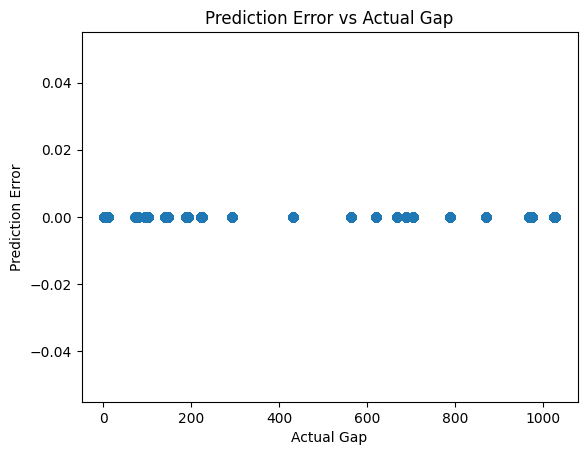

In [29]:
error = best_test_Col_Y - Y_pred_best

plt.scatter(best_test_Col_Y, error)
plt.xlabel('Actual Gap')
plt.ylabel('Prediction Error')
plt.title('Prediction Error vs Actual Gap')
plt.show()